# Singular Value Decomposition
A possibility to play around with the SVDs of images.

In [1]:
from ipywidgets import interact, interact_manual, fixed
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

def choose_image(url):
    A = io.imread(url)
    if(A.ndim == 3): #handle color images
        X = np.mean(A, -1)
    else:
        X = A
    m = X.shape[0]
    n = X.shape[1]
    U, S, VT = np.linalg.svd(X)
    Sig = np.diag(S) # the singular values are given as 1D array by np.linalg.svd, so they need to be turned into a diagonal matrix
    return A, X, m, n, U, S, VT, Sig

def plot(data, k=1):
    A, X, m, n, U, S, VT, Sig = data
    print(str(round(100 * (m * k + k + k * n) / (m * n), 2)) + "% of original file size.")
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
    img = ax1.imshow(U[:, :k] @ Sig[:k,:k] @ VT[:k,:])
    img.set_cmap('gray')
    ax1.axis('off')
    
    ax2.plot(np.cumsum(S) / np.sum(S), label=r'$\frac{\sum_{i=1}^{k}\sigma_i}{\sum_{i=1}^{r}\sigma_i}$')
    ax2.legend()
    ax2.set_xlabel('k')
    ax2.plot(k, np.sum(Sig[:k, :k]) / np.sum(S), 'ro')
    ax2.set_ylim([0, 1.1])
    
    ax3.plot(S, label=r'$\sigma_k$')
    ax3.legend()
    ax3.plot(k-1, S[k-1], 'ro')
    ax3.set_yscale('log')
    ax3.set_xlabel('k')
    plt.show()

In [2]:
magistrale = choose_image('https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/MI-Geb%C3%A4ude_der_TU_M%C3%BCnchen_Magistrale2.JPG/1280px-MI-Geb%C3%A4ude_der_TU_M%C3%BCnchen_Magistrale2.JPG')
_, X, _, _, _, _, _, _ = magistrale
sigmabox = widgets.BoundedIntText(
    min=1,
    max=np.linalg.matrix_rank(X),
    step=1,
    description='Max. Sigma:'
)

interact(plot, data=fixed(magistrale), k=sigmabox);

interactive(children=(BoundedIntText(value=1, description='Max. Sigma:', max=853, min=1), Output()), _dom_clas…

In [3]:
square = choose_image('https://raw.githubusercontent.com/JonasJJJJ/LowRankApproximation/master/square.png')
_, X, _, _, _, _, _, _ = square
sigmabox = widgets.BoundedIntText(
    min=1,
    max=np.linalg.matrix_rank(X),
    step=1,
    description='Max. Sigma:'
)
interact(plot, data=fixed(square), k=sigmabox);

interactive(children=(BoundedIntText(value=1, description='Max. Sigma:', max=1, min=1), Output()), _dom_classe…

In [4]:
square15 = choose_image('https://raw.githubusercontent.com/JonasJJJJ/LowRankApproximation/master/square15bw.png')
_, X, _, _, _, _, _, _ = square15
sigmabox = widgets.BoundedIntText(
    min=1,
    max=np.linalg.matrix_rank(X),
    step=1,
    description='Max. Sigma:'
)
interact(plot, data=fixed(square15), k=sigmabox);

interactive(children=(BoundedIntText(value=1, description='Max. Sigma:', max=197, min=1), Output()), _dom_clas…

In [5]:
square30 = choose_image('https://raw.githubusercontent.com/JonasJJJJ/LowRankApproximation/master/square30bw.png')
_, X, _, _, _, _, _, _ = square30
sigmabox = widgets.BoundedIntText(
    min=1,
    max=np.linalg.matrix_rank(X),
    step=1,
    description='Max. Sigma:'
)
interact(plot, data=fixed(square30), k=sigmabox);

interactive(children=(BoundedIntText(value=1, description='Max. Sigma:', max=292, min=1), Output()), _dom_clas…

In [6]:
square45 = choose_image('https://raw.githubusercontent.com/JonasJJJJ/LowRankApproximation/master/square45bw.png')
_, X, _, _, _, _, _, _ = square45
sigmabox = widgets.BoundedIntText(
    min=1,
    max=np.linalg.matrix_rank(X),
    step=1,
    description='Max. Sigma:'
)
interact(plot, data=fixed(square45), k=sigmabox);

interactive(children=(BoundedIntText(value=1, description='Max. Sigma:', max=202, min=1), Output()), _dom_clas…

In [7]:
rotatedsquare = choose_image('https://raw.githubusercontent.com/JonasJJJJ/LowRankApproximation/master/rotatedsquare.png')
_, X, _, _, _, _, _, _ = rotatedsquare
sigmabox = widgets.BoundedIntText(
    min=1,
    max=np.linalg.matrix_rank(X),
    step=1,
    description='Max. Sigma:'
)
interact(plot, data=fixed(rotatedsquare), k=sigmabox);

interactive(children=(BoundedIntText(value=1, description='Max. Sigma:', max=339, min=1), Output()), _dom_clas…

# Interpolative Decomposition
Note how the first, 4th, 7th and 8th column of the right matrix form the identity matrix and how the left matrix consists of the 8th, the 4th, the 7th and the first column of A.

In [8]:
from ipywidgets import interact
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

def visualize_matrices(normalize_color=False, rows=1, **kwargs):
    if normalize_color:
        vmin = np.finfo(np.float32).max
        vmax = np.finfo(np.float32).min
        for name, A in kwargs.items():
            m = np.amin(A)
            if vmin > m:
                vmin = m
            m = np.amax(A)
            if vmax < m:
                vmax = m
    
    fig, axes = plt.subplots(rows, (len(kwargs)-1) // rows + 1)
    i = 0
    for name, A in kwargs.items():
        axes[i].set_title(name)
        if normalize_color:
            im = axes[i].imshow(A, vmin=vmin, vmax=vmax)
        else:
            axes[i].imshow(A)
        axes[i].yaxis.set_ticks([0, A.shape[0]-1] if A.shape[0] > 1 else [])
        axes[i].xaxis.set_ticks([0, A.shape[1]-1] if A.shape[1] > 1 else [])
        i += 1
    if normalize_color:
        fig.colorbar(im, ax=axes.ravel().tolist())
    else:
        fig.tight_layout()
    plt.show()


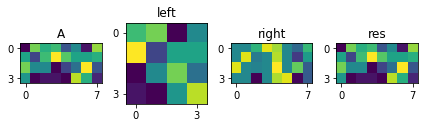

In [9]:
import scipy.linalg.interpolative as sli
A = np.random.randint(-10, high=10, size=(4, 8)) * 1.0
k = np.linalg.matrix_rank(A)
idx, proj = sli.interp_decomp(A, 4)
left = A[:,idx[:k]] # the first k indices in idx are the chosen columns of A
right = np.hstack([np.eye(k), proj]) # the first k columns in idx should be multiplied with I_k
right = right[:, np.argsort(idx)] # idx gives the order in which the columns need to be
visualize_matrices(A=A, left=left, right=right, res=left @ right)